In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer # i picked a binary class data set
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer(return_X_y = True, as_frame = True ) 
print('Our data has',data[0].shape[1],'features which are attributes of the tumor like',*list(data[0].keys())[:3],'etc, class 0 means malignant tumor and class 1 means benign tumor')

Our data has 30 features which are attributes of the tumor like mean radius mean texture mean perimeter etc, class 0 means malignant tumor and class 1 means benign tumor


In [3]:
cancer_data = data[0]
#features = np.array(cancer_data.keys())
# what are the differences between lists and arrays ?
features = cancer_data.keys()
cancer_data.columns = features
cancer_data['type'] = data[1]
del data

In [4]:
test_size = 0.8
train, test = train_test_split (cancer_data, test_size=test_size)
print(f'We are using {len(train)} samples for training and {len(test)} samples for testing/validation') 
max_iterations = 30
classifier = LogisticRegression (random_state=0 , solver='liblinear', penalty='l2', n_jobs=1, max_iter=max_iterations )
classifier.fit(train[features],train['type'])
print(f'\niterations to converge = {classifier.n_iter_[0]}  \nintercept = {classifier.intercept_[0]} \ncoefficients = {list(classifier.coef_[0])}')

We are using 113 samples for training and 456 samples for testing/validation

iterations to converge = 21  
intercept = 0.2030558216400218 
coefficients = [1.3463215661136692, -0.0076141774397330796, 0.04406204324697174, 0.006867854530036686, -0.04072955168176151, -0.2128881184365512, -0.29355476047399914, -0.1460538270889988, -0.05731943830816998, -0.010005112731955814, 0.05142591060228836, 0.48377809539681543, -0.033047193573241665, -0.03268303237229105, -0.015270548862917338, -0.04107808373738012, -0.06994499238269547, -0.029918352722781982, -0.038577829330613864, -0.005207927587367274, 1.1097275025108013, -0.17921965779534063, -0.11185279344270684, -0.0341083448497732, -0.05707933833009267, -0.39566140042449993, -0.43421090137089746, -0.24208384166188193, -0.2605252689109488, -0.017759371712353585]


In [5]:
def print_sigmoid_function(classifier): #your function to print the F
    formula = str (round(classifier.intercept_[0], 2))
    for coef, column in zip(classifier.coef_[0],features):
        formula += ' + (' +  str(round(coef,2)) + ' * ' + '\033[1m' + str(column) + '\033[0m' + ')'
    print(f'The expit function is 1/(1+exp(-F)), where F is \nF = {formula}')
        
print_sigmoid_function(classifier)

The expit function is 1/(1+exp(-F)), where F is 
F = 0.2 + (1.35 * mean radius) + (-0.01 * mean texture) + (0.04 * mean perimeter) + (0.01 * mean area) + (-0.04 * mean smoothness) + (-0.21 * mean compactness) + (-0.29 * mean concavity) + (-0.15 * mean concave points) + (-0.06 * mean symmetry) + (-0.01 * mean fractal dimension) + (0.05 * radius error) + (0.48 * texture error) + (-0.03 * perimeter error) + (-0.03 * area error) + (-0.02 * smoothness error) + (-0.04 * compactness error) + (-0.07 * concavity error) + (-0.03 * concave points error) + (-0.04 * symmetry error) + (-0.01 * fractal dimension error) + (1.11 * worst radius) + (-0.18 * worst texture) + (-0.11 * worst perimeter) + (-0.03 * worst area) + (-0.06 * worst smoothness) + (-0.4 * worst compactness) + (-0.43 * worst concavity) + (-0.24 * worst concave points) + (-0.26 * worst symmetry) + (-0.02 * worst fractal dimension)


In [6]:
pred = classifier.predict(test[features])
print('predictions\n',list(pred))
print('\nactual results\n',list(test['type']))

predictions
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [7]:
correct = 0
for prediction , real  in zip(pred, test['type']):
    if prediction == real:
        correct += 1
print('Correctly guessed:', correct, 'out of', len(pred), '\nEfficiency = ', 100*round(correct/len(pred),2),'%')

Correctly guessed: 430 out of 456 
Efficiency =  94.0 %


In [8]:
number_of_probs_to_print = 10
test_values = test[features].values
types = []
for r in test.values:
    t = classifier.intercept_[0] + sum(val*coef for val,coef in zip(r,classifier.coef_[0]))
    prob = 1/(1+np.exp(-t))
    types.append(round(prob,4))
probs_and_reals = list(zip(types,test['type']))    
print('Some of the first instances of probabilities of the result zipped with the actual result', *probs_and_reals[:number_of_probs_to_print])

Some of the first instances of probabilities of the result zipped with the actual result (0.0, 0) (0.0996, 0) (0.9715, 0) (0.0309, 0) (0.9979, 1) (0.9959, 1) (0.9934, 1) (0.958, 1) (0.0, 0) (0.9813, 1)


In [9]:
probs = classifier.predict_proba(test[features])
print(probs[:number_of_probs_to_print],'\n\nwe can see they are complentary')
# i dont know how not to print in scientific form

[[9.99999854e-01 1.45508434e-07]
 [9.00372871e-01 9.96271295e-02]
 [2.84979761e-02 9.71502024e-01]
 [9.69105852e-01 3.08941483e-02]
 [2.12034461e-03 9.97879655e-01]
 [4.10363312e-03 9.95896367e-01]
 [6.58174995e-03 9.93418250e-01]
 [4.19511828e-02 9.58048817e-01]
 [1.00000000e+00 8.16625312e-14]
 [1.86732718e-02 9.81326728e-01]] 

we can see they are complentary


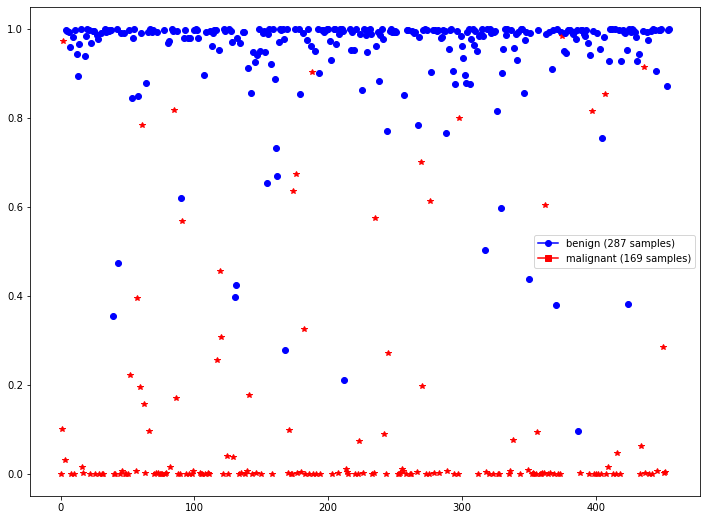

In [10]:
max_number_of_samples = len(test)
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
b = 0
m = 0
for n in range(len(np.array(probs_and_reals)[:max_number_of_samples,1])):
    if (np.array(probs_and_reals)[n,1] == 1.0) :
        ax.plot(n,np.array(probs_and_reals)[n,0],'ob')
        b += 1
    elif (np.array(probs_and_reals)[n,1] == 0.0) :
        ax.plot(n,np.array(probs_and_reals)[n,0],'*r')#label='malignant')
        m += 1
ax.plot([],[],marker='o',color='b',label='benign ('+str(b)+' samples)')
ax.plot([],[],marker='s',color='r',label='malignant ('+str(m)+' samples)')
plt.legend(loc='best');

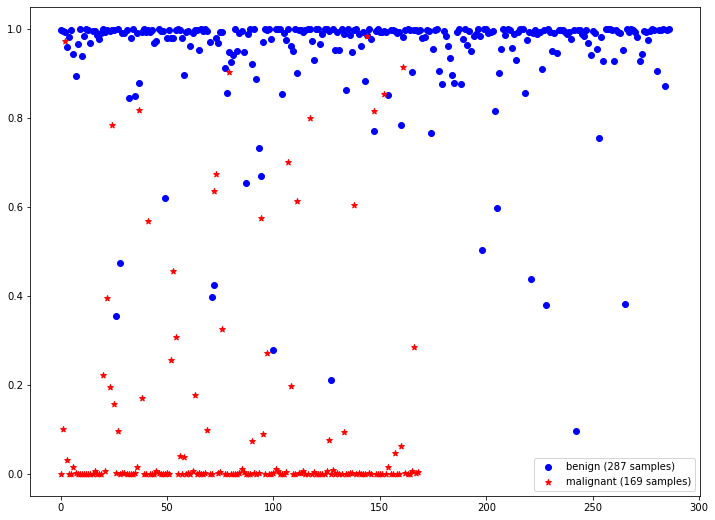

In [11]:
def plot_prediction_probability_with_real_result_class (probs_and_reals):
    malignants = []
    benigns = []
    for probability , result in probs_and_reals:
        if result == 0 :
            malignants.append(probability)
        elif result == 1 :
            benigns.append(probability) 
    fig = plt.figure(figsize=(12,9))
    ax1 = fig.add_subplot(111)
    ax1.scatter( range(len(benigns)), benigns, color='blue', marker='o',label='benign ('+str(len(benigns))+' samples)')
    ax1.scatter( range(len(malignants)), malignants, color='red', marker='*',label='malignant ('+str(len(malignants))+' samples)')
    plt.legend(loc='best')

plot_prediction_probability_with_real_result_class (probs_and_reals[:max_number_of_samples])

#this way was fitting because we had equal samples of the the two classes it gets weird when they are diffrent 

In [12]:
print ('to find the features that are relevant we pick the ones with z scores > 2 and pvalues < 0.05\n')
from sklearn.feature_selection import chi2
relevant_features =[]
irrelevant_features =[]
scores, pvalues = chi2(train[features],train['type'])
#list(zip(features,scores,pvalues))
for f, s, p in zip(features,scores,pvalues):
    if s >= 2 and p <= 0.05 :
        relevant_features.append(f)
    else:
        irrelevant_features.append(f)
print('relevant features',relevant_features,'\n\nirrelevant_features',irrelevant_features)


to find the features that are relevant we pick the ones with z scores > 2 and pvalues < 0.05

relevant features ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity'] 

irrelevant_features ['mean smoothness', 'mean compactness', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst compactness', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [13]:
print ('same code as above but with the relevant features:',relevant_features)
max_iterations = 30
classifier = LogisticRegression (random_state=0 , solver='liblinear', penalty='l2', n_jobs=1, max_iter=max_iterations )
classifier.fit(train[relevant_features],train['type'])
print(f'\niterations to converge = {classifier.n_iter_[0]}  \nintercept = {classifier.intercept_[0]} \ncoefficients = {list(classifier.coef_[0])} \n')
print_sigmoid_function(classifier)
pred = classifier.predict(test[relevant_features])
correct = 0
for prediction , real  in zip(pred, test['type']):
    if prediction == real:
        correct += 1
print('\nWith the fewer but most relevant features: correctly guessed', correct, 'out of', len(pred), 'cases (', 100*round(correct/len(pred),2),'% efficiency ), not bad!!! ')
#print('\npredictions\n',list(pred))
#print('\nactual results\n',list(test['type']))


same code as above but with the relevant features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']

iterations to converge = 20  
intercept = 0.19074206494122595 
coefficients = [1.2566691397223786, -0.05244282853228778, 0.08109040076416703, 0.007238805804572218, -0.272895092186609, 0.05136879159023095, -0.02806149838213589, -0.017944989585962252, 1.0808271696753295, -0.11405600613875114, -0.13522795118567615, -0.03462293440709838, -0.4158079937626385] 

The expit function is 1/(1+exp(-F)), where F is 
F = 0.19 + (1.26 * mean radius) + (-0.05 * mean texture) + (0.08 * mean perimeter) + (0.01 * mean area) + (-0.27 * mean smoothness) + (0.05 * mean compactness) + (-0.03 * mean concavity) + (-0.02 * mean concave points) + (1.08 * mean symmetry) + (-0.11 * mean fractal dimension) + (-0.14 * radius error) + (-0.03 * texture er

In [219]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score 

percentage_of_samples_used_for_testing = 1/3
train, test = train_test_split(cancer_data, test_size = percentage_of_samples_used_for_testing)

input_features = relevant_features

C = np.linspace(1,1000,20,dtype=int)
gamma = [0.000001,0.00001,0.0001,0.001,0.01]
index = C
df = pd.DataFrame(index=index)

for g in gamma :
    column = []
    for c,n in zip(C,range(len(C))):
        classifier = svm.SVC(kernel ='rbf', gamma=g, C=c)
        classifier.fit(train[input_features], train['type'])
        svc_predictions = classifier.predict(test[input_features])
        svc_a = balanced_accuracy_score(test['type'],svc_predictions)
        column.append(round(svc_a,4)) 
    df[str(g)] = column
print('parameter grid search\ncolumns : gamma parameter\nrows : C parameter\n')
df

parameter grid search
columns : gamma parameter
rows : C parameter



,1e-06,1e-05,0.0001,0.001,0.01
1,0.9023,0.9088,0.9368,0.9079,0.500
53,0.9392,0.9368,0.9147,0.9144,0.513
106,0.9522,0.9433,0.9103,0.9144,0.513
158,0.9522,0.9389,0.9103,0.9144,0.513
211,0.9522,0.9345,0.9103,0.9144,0.513
263,0.9522,0.9345,0.9103,0.9144,0.513
316,0.9522,0.9345,0.9103,0.9144,0.513
369,0.9522,0.9345,0.9103,0.9144,0.513
421,0.9522,0.9345,0.9103,0.9144,0.513
474,0.9522,0.9345,0.9103,0.9144,0.513


In [218]:
percentage_of_samples_used_for_testing = 1/3
train, test = train_test_split(cancer_data, test_size = percentage_of_samples_used_for_testing)

for deg in[1,2,3,4,5,6]:
    classifier = svm.SVC(kernel ='poly',degree=deg)
    classifier.fit(train[input_features], train['type'])
    svc_predictions = classifier.predict(test[input_features])
    svc_a = balanced_accuracy_score(test['type'],svc_predictions)
    print(deg, svc_a)


1 0.8839946608421307
2 0.8914573474092949
3 0.8839946608421307
4 0.8839946608421307
5 0.8839946608421307
6 0.8880597014925373


In [199]:
df = pd.DataFrame()

In [76]:
df

""
